# START:

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
%load_ext autoreload
%autoreload 2
# The above two cell magic commands auto reloads the imported modules
# and uses the most current version. This is helpful is one makes changes to
# any of the imported modules code and wants to use the recently modified module.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Obtain the  train data

In [ ]:
data_path = 'drive/My Drive/DATA/human-activity-recognition/tabular/'

In [ ]:
df_tr = pd.read_csv(data_path  + 'har_train.csv')
df_ts = pd.read_csv(data_path  + 'har_test.csv')

df_tr.shape, df_ts.shape

((7352, 563), (2947, 563))

In [ ]:
df_tr.head()

,tbodyacc_mean_x,tbodyacc_mean_y,tbodyacc_mean_z,tbodyacc_std_x,tbodyacc_std_y,tbodyacc_std_z,tbodyacc_mad_x,tbodyacc_mad_y,tbodyacc_mad_z,tbodyacc_max_x,...,fbodybodygyrojerkmag_kurtosis,angle_tbodyaccmeangravity,angle_tbodyaccjerkmeangravitymean,angle_tbodygyromeangravitymean,angle_tbodygyrojerkmeangravitymean,angle_xgravitymean,angle_ygravitymean,angle_zgravitymean,subject,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tbodyacc_mean_x to activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


## 1. Check for Duplicates

In [ ]:
print(f'n_duplicates_tr: {sum(df_tr.duplicated())}')
print(f'n_duplicates_ts: {sum(df_ts.duplicated())}')

n_duplicates_tr: 0
n_duplicates_ts: 0


## 2. Checking for NaN/null values

In [ ]:
print(f'n_null_tr: {df_tr.isnull().values.sum()}')
print(f'n_null_ts: {df_ts.isnull().values.sum()}')

n_null_tr: 0
n_null_ts: 0


## 3. Check for data imbalance

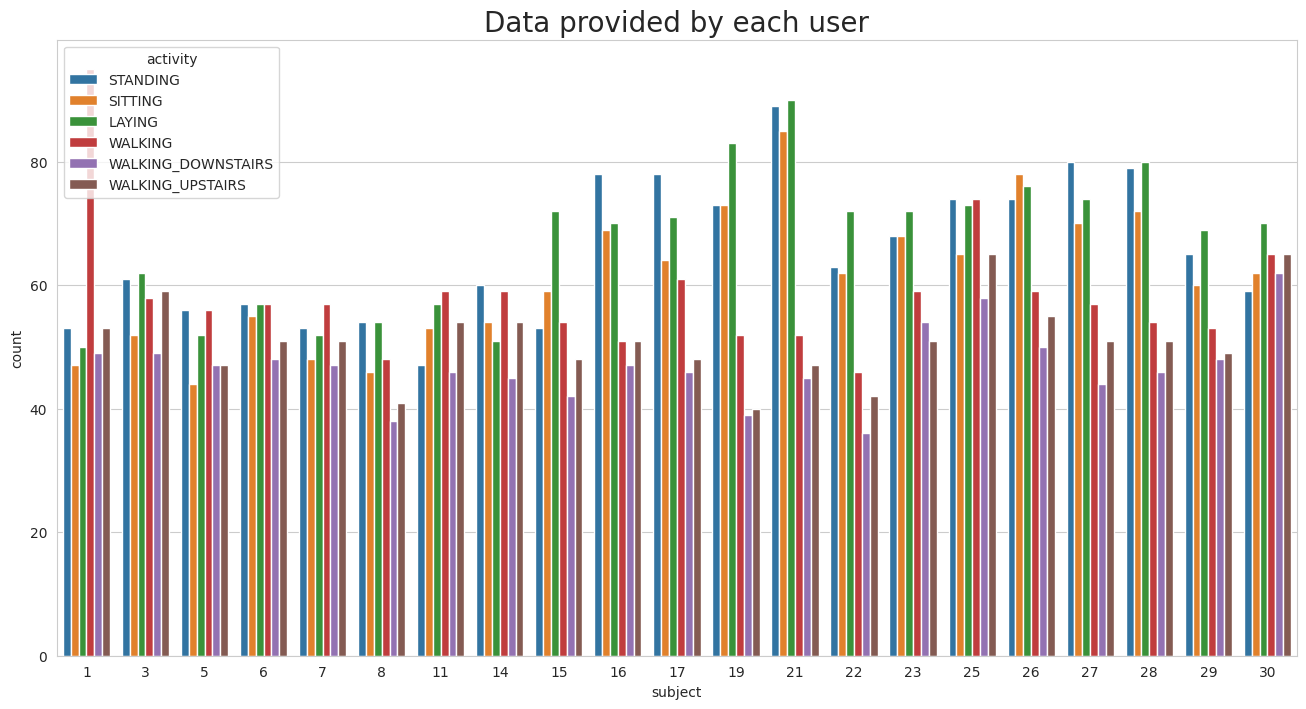

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='activity', data = df_tr)
plt.show()


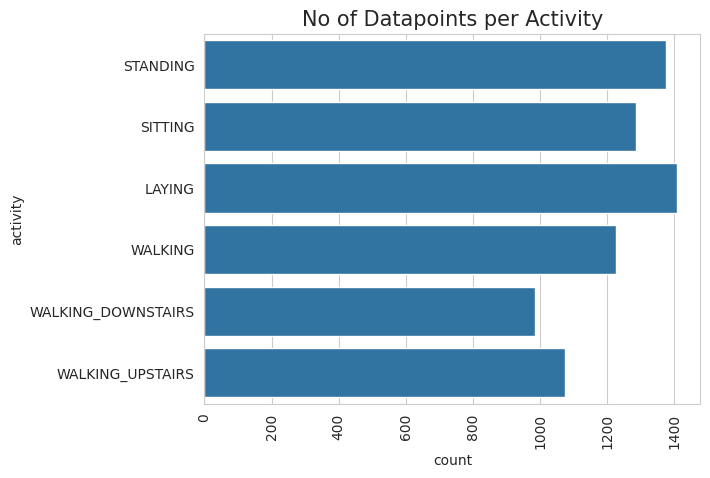

In [ ]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(df_tr.activity)
plt.xticks(rotation=90)
plt.show()

# Exploratory Data Analysis

### 1. Featuring Engineering from Domain Knowledge




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

In [ ]:
[i for i in df_tr.columns if 'activity' in i]

['activity']

### 3. Magnitude of an acceleration can saperate it well

<Figure size 1400x700 with 0 Axes>

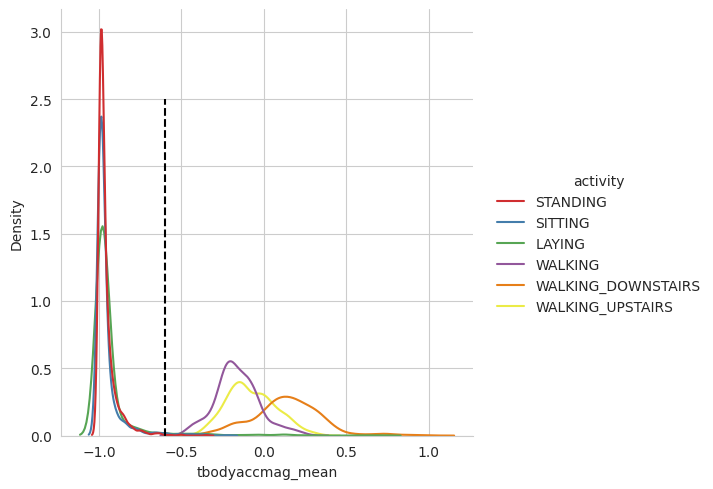

In [ ]:
plt.figure(figsize = (14, 7))
sns.displot(data=df_tr, x="tbodyaccmag_mean", hue="activity", kind="kde")
plt.vlines(-0.60, 0, 2.5, linestyles= '--', colors = 'black')
plt.show()

### 4. Position of GravityAccelerationComponants also matters

<Figure size 1400x700 with 0 Axes>

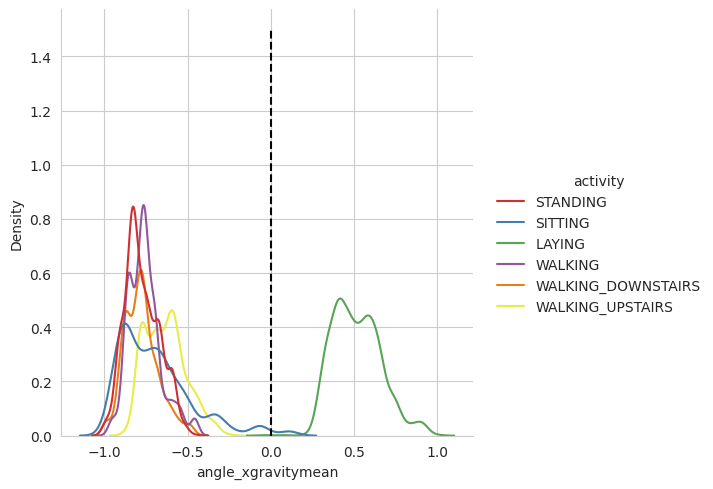

In [ ]:
plt.figure(figsize = (14, 7))
sns.displot(data=df_tr, x="angle_xgravitymean", hue="activity", kind="kde")
plt.vlines(0.0, 0, 1.5, linestyles= '--', colors = 'black')
plt.show()

<Figure size 1400x700 with 0 Axes>

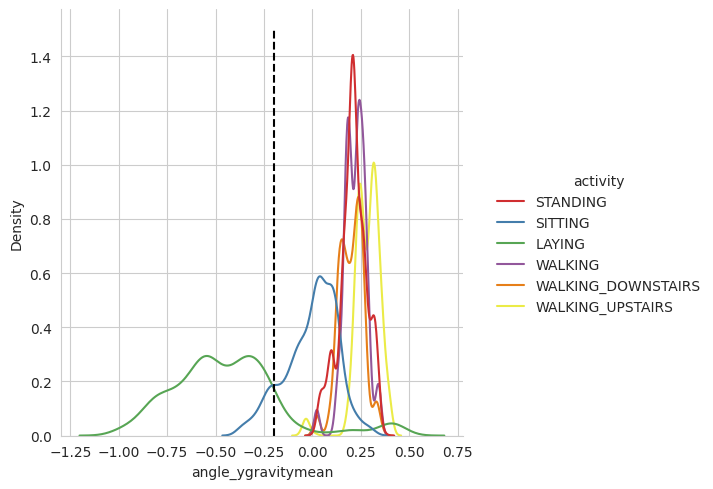

In [ ]:
plt.figure(figsize = (14, 7))
sns.displot(data=df_tr, x="angle_ygravitymean", hue="activity", kind="kde")
plt.vlines(-0.2, 0, 1.5, linestyles= '--', colors = 'black')
plt.show()

In [ ]:
df_tr.subject.value_counts()

subject
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: count, dtype: int64

In [ ]:
c = df_tr.subject == 25

df_tr_25 = df_tr[c]
df_tr_25

,tbodyacc_mean_x,tbodyacc_mean_y,tbodyacc_mean_z,tbodyacc_std_x,tbodyacc_std_y,tbodyacc_std_z,tbodyacc_mad_x,tbodyacc_mad_y,tbodyacc_mad_z,tbodyacc_max_x,...,fbodybodygyrojerkmag_kurtosis,angle_tbodyaccmeangravity,angle_tbodyaccjerkmeangravitymean,angle_tbodygyromeangravitymean,angle_tbodygyrojerkmeangravitymean,angle_xgravitymean,angle_ygravitymean,angle_zgravitymean,subject,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,25,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,25,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,25,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,25,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,25,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,25,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,25,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,25,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,25,WALKING_UPSTAIRS


In [ ]:
df_tr_25.activity.value_counts()

activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [ ]:
c1 = df_tr_25.activity == 'LAYING'

df_tr_25[c1]

,tbodyacc_mean_x,tbodyacc_mean_y,tbodyacc_mean_z,tbodyacc_std_x,tbodyacc_std_y,tbodyacc_std_z,tbodyacc_mad_x,tbodyacc_mad_y,tbodyacc_mad_z,tbodyacc_max_x,...,fbodybodygyrojerkmag_kurtosis,angle_tbodyaccmeangravity,angle_tbodyaccjerkmeangravitymean,angle_tbodygyromeangravitymean,angle_tbodygyrojerkmeangravitymean,angle_xgravitymean,angle_ygravitymean,angle_zgravitymean,subject,activity
51,0.403474,-0.015074,-0.118167,-0.914811,-0.895231,-0.891748,-0.917696,-0.924624,-0.905895,-0.785104,...,-0.021764,-0.068580,-0.043105,-0.332249,0.487505,0.432479,-0.553351,-0.432876,25,LAYING
52,0.278373,-0.020561,-0.096825,-0.984883,-0.991118,-0.982112,-0.987985,-0.990362,-0.982189,-0.920051,...,-0.912512,-0.113048,0.223038,-0.393075,0.359037,0.399853,-0.550364,-0.427593,25,LAYING
53,0.276555,-0.017869,-0.107621,-0.994195,-0.996372,-0.995615,-0.994901,-0.996360,-0.996628,-0.940164,...,-0.813040,0.293145,-0.018635,-0.246980,0.453923,0.399066,-0.546725,-0.431244,25,LAYING
54,0.279575,-0.017276,-0.109481,-0.996135,-0.995812,-0.998689,-0.996393,-0.995474,-0.999006,-0.940773,...,-0.984028,0.240526,0.149804,0.393611,0.386719,0.399555,-0.546477,-0.431646,25,LAYING
55,0.276527,-0.016819,-0.107983,-0.996775,-0.997256,-0.995422,-0.997167,-0.997108,-0.995739,-0.942673,...,-0.954254,-0.347519,-0.469155,0.308855,-0.354146,0.398889,-0.546712,-0.431207,25,LAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7257,0.289190,-0.021629,-0.098895,-0.988299,-0.990813,-0.987266,-0.989408,-0.991358,-0.986747,-0.925886,...,-0.903879,-0.015004,-0.005233,-0.045099,0.369611,0.565442,-0.534374,-0.470897,25,LAYING
7258,0.288863,-0.021427,-0.101431,-0.990721,-0.993126,-0.990502,-0.991438,-0.992836,-0.989968,-0.925886,...,-0.941084,0.049695,-0.184366,-0.351473,0.213075,0.562080,-0.531512,-0.473734,25,LAYING
7259,0.282409,-0.018051,-0.108965,-0.993142,-0.993896,-0.998631,-0.992864,-0.992996,-0.999530,-0.939157,...,-0.893333,0.286570,-0.206377,-0.081676,-0.681660,0.559409,-0.529620,-0.475579,25,LAYING
7260,0.282771,-0.016040,-0.111293,-0.994014,-0.993007,-0.994326,-0.994220,-0.993099,-0.995379,-0.939157,...,-0.955822,0.061299,0.272947,0.299691,-0.116838,0.558825,-0.529376,-0.475804,25,LAYING


# Apply t-sne on the data

In [ ]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):

    for index,perplexity in enumerate(perplexities):

        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')

        # prepare the data for seaborn
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})

        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.247s...
[t-SNE] Computed neighbors for 7352 samples in 39.793s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.051s
[t-SNE] Iteration 50: error = 124.6206818, gradient norm = 0.0287321 (50 iterations in 13.293s)
[t-SNE] Iteration 100: error = 107.1490707, gradient norm = 0.0296144 (50 iterations i

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


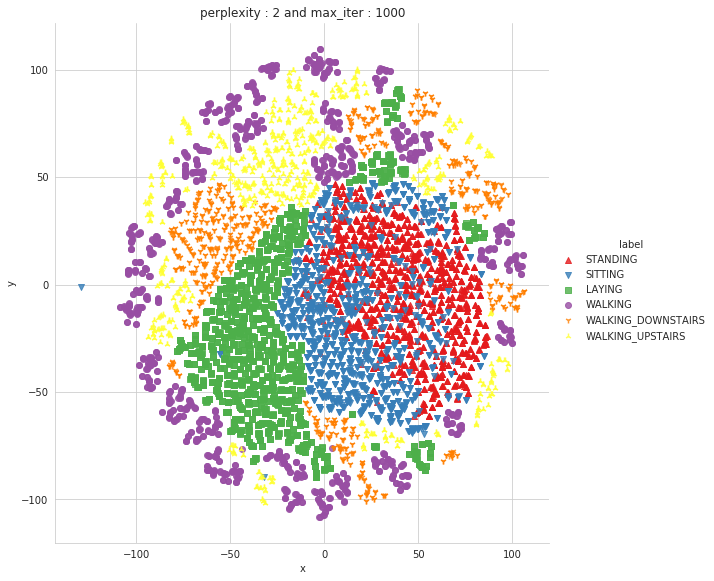

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.258s...
[t-SNE] Computed neighbors for 7352 samples in 40.662s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 113.9269333, gradient norm = 0.0242700 (50 iterations in 7.336s)
[t-SNE] Iteration 100: error = 97.1233902, gradient norm = 0.0141822 (50 iteratio

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


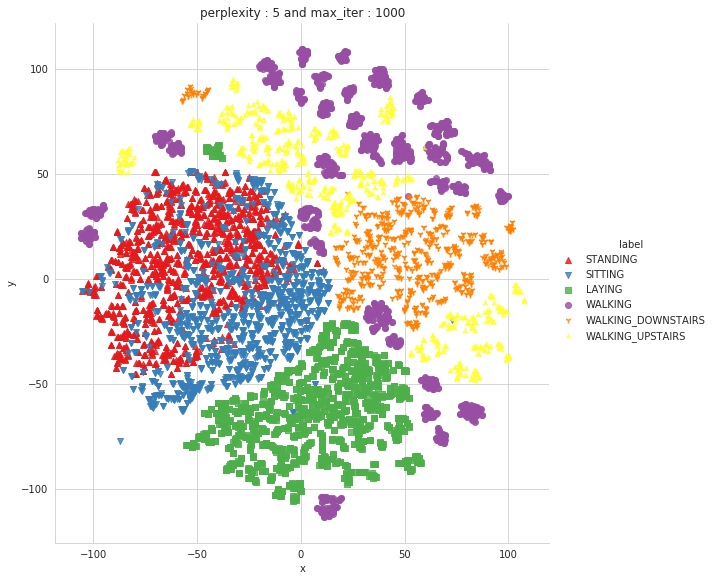

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.255s...
[t-SNE] Computed neighbors for 7352 samples in 41.854s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.122s
[t-SNE] Iteration 50: error = 106.0788040, gradient norm = 0.0146408 (50 iterations in 3.851s)
[t-SNE] Iteration 100: error = 90.3525848, gradient norm = 0.0093603 (50 iterati

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


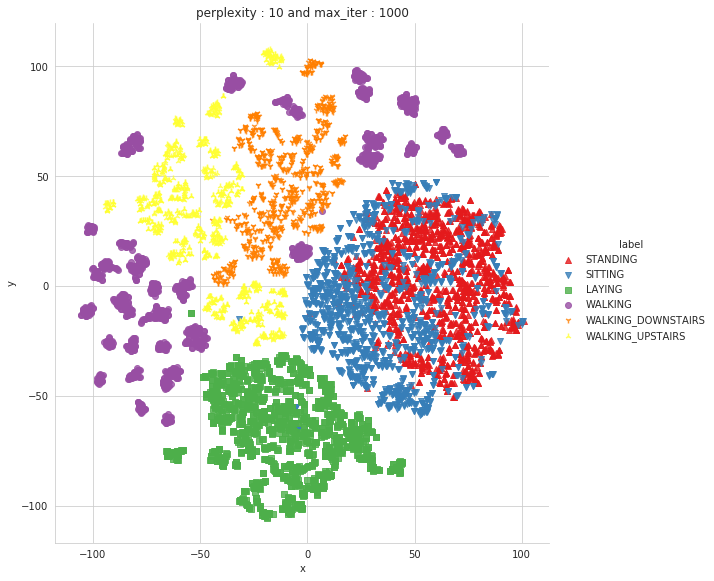

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.242s...
[t-SNE] Computed neighbors for 7352 samples in 42.508s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.239s
[t-SNE] Iteration 50: error = 97.8942032, gradient norm = 0.0155109 (50 iterations in 3.840s)
[t-SNE] Iteration 100: error = 83.9126663, gradient norm = 0.0077407 (50 iteratio

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


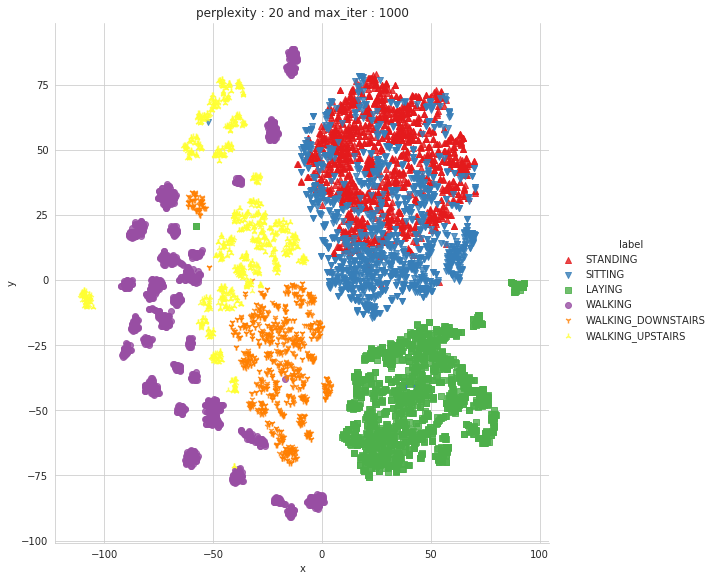

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.244s...
[t-SNE] Computed neighbors for 7352 samples in 43.232s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.598s
[t-SNE] Iteration 50: error = 86.5698624, gradient norm = 0.0187787 (50 iterations in 4.194s)
[t-SNE] Iteration 100: error = 75.5014191, gradient norm = 0.0037396 (50 iterati

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


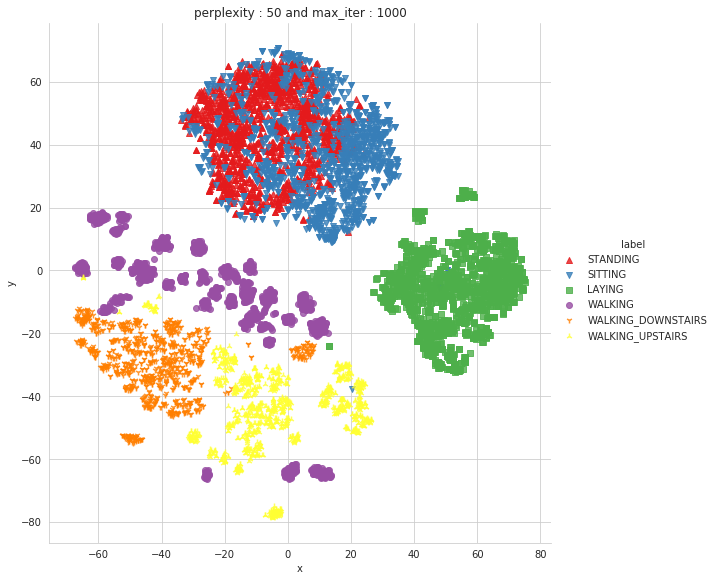

Done
CPU times: user 8min 10s, sys: 4.48 s, total: 8min 15s
Wall time: 8min 11s


In [ ]:
X_pre_tsne = df_tr.drop(['subject', 'activity'], axis=1)
y_pre_tsne = df_tr['activity']

% time perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

###  >>  FROM THE TSNE PLOTS ITS CAN BE SEEN THAT ALL CLASSES EXCEPT FOR 'STANDING'  & 'SITTING'  ARE QUITE WELL SEPARATED.